TITLE:-  SUPERMART GROCERY SALES

INTRODUCTION: In today's competitive retail landscape, understanding and analyzing grocery sales performance is crucial for supermarket success.So this project identify the patterns between features and future sales prediction,which helps to improve the future sales and trends.

SCOPE: The ojective of this project is to find patterns and future sales prediction using the machine learning models. This report looks at how well Supermart's grocery store is doing with its sales. In this, checks what products are selling best, how much sales the store is making, and what customers like to buy. This information will help us find ways to make the store better.

ATTRIBUTE INFORMATION: 
-->The dataset comprises 499 rows and 14 columns (features).
-->Each row represents the sales and profits.
-->Explore how factors such as store location, size, product assortment, pricing strategies, and customer demographics influence sales patterns. 
-->The `Sales` column is the target variable. It signifies the future sales predictions.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [3]:
# Import library
# Display the top 5 records
import pandas as pd
data=pd.read_csv("Supermart Grocery Sales.csv")
# Convert Order Date to datetime
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Month"] = data["Order Date"].dt.strftime('%b') 
data["Year"] = data["Order Date"].dt.year
# Add new column
data["Profit_Margin"] = data["Profit"] / data["Sales"]
data.head()

,Order ID,Order Date,Region,City,Customer Name,Category,Sub Category,quantity,Sales,Discount,Profit,Month,Year,Profit_Margin
0,OD1,2017-11-08,North,Vellore,Harish,Oil & Masala,Masalas,5,1254,0.12,401.28,Nov,2017,0.32
1,OD2,2017-11-08,South,Krishnagiri,Sudha,Beverages,Health Drinks,21,749,0.18,149.80,Nov,2017,0.20
2,OD3,2017-06-12,West,Perambalur,Hussain,Food Grains,Atta & Flour,2,2360,0.21,165.20,Jun,2017,0.07
3,OD4,2016-10-11,South,Dharmapuri,Jackson,Fruits & Veggies,Fresh Vegetables,6,896,0.25,89.60,Oct,2016,0.10
4,OD5,2016-10-11,South,Ooty,Ridhesh,Food Grains,Organic Staples,5,2355,0.26,918.45,Oct,2016,0.39


Observation: Shows the top 5 records of rows and columns

In [11]:
# Check number of rows and columns
data.shape

(499, 14)

In [13]:
# data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order ID       499 non-null    object        
 1   Order Date     499 non-null    datetime64[ns]
 2   Region         499 non-null    object        
 3   City           499 non-null    object        
 4   Customer Name  499 non-null    object        
 5   Category       499 non-null    object        
 6   Sub Category   499 non-null    object        
 7   quantity       499 non-null    int64         
 8   Sales          499 non-null    int64         
 9   Discount       499 non-null    float64       
 10  Profit         499 non-null    float64       
 11  Month          499 non-null    object        
 12  Year           499 non-null    int32         
 13  Profit_Margin  499 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1), int64(2), object(7)
memory usa

In [15]:
# Describe about dataset
data.describe()

,Order Date,quantity,Sales,Discount,Profit,Year,Profit_Margin
count,499,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,2017-03-19 23:36:54.829659136,12.549098,1458.432866,0.223507,370.818998,2016.573146,0.252766
min,2015-02-12 00:00:00,1.000000,502.000000,0.100000,34.300000,2015.000000,0.050000
25%,2016-04-11 12:00:00,6.000000,962.000000,0.170000,181.880000,2016.000000,0.160000
50%,2017-04-25 00:00:00,12.000000,1421.000000,0.220000,322.700000,2017.000000,0.260000
75%,2017-12-09 00:00:00,18.000000,1967.000000,0.280000,520.130000,2017.000000,0.350000
max,2018-12-28 00:00:00,30.000000,2500.000000,0.350000,1040.160000,2018.000000,0.450000
std,NaN,7.288869,576.481720,0.072538,238.418780,1.071800,0.117915


In [164]:
# Check null values
data.isnull().sum()

Order ID         0
Order Date       0
Region           0
City             0
Customer Name    0
Category         0
Sub Category     0
quantity         0
Sales            0
Discount         0
Profit           0
Month            0
Year             0
Profit_Margin    0
dtype: int64

In [166]:
# Check the duplicate values
data.duplicated().sum()

0

In [ ]:
Observation: No duplicate values in dataset

In [168]:
# check number of unique values
data.nunique()

Order ID         499
Order Date       198
Region             5
City              24
Customer Name     50
Category           7
Sub Category      23
quantity          26
Sales            450
Discount          26
Profit           493
Month             12
Year               4
Profit_Margin     81
dtype: int64

In [ ]:
Observation: The dataset has different unique values in each category

In [170]:
# Check unique values in each column
for col in data.columns:
    Unique_values=data[col].unique()
    print(f'{col}:',Unique_values)

Order ID: ['OD1' 'OD2' 'OD3' 'OD4' 'OD5' 'OD6' 'OD7' 'OD8' 'OD9' 'OD10' 'OD11'
 'OD12' 'OD13' 'OD14' 'OD15' 'OD16' 'OD17' 'OD18' 'OD19' 'OD20' 'OD21'
 'OD22' 'OD23' 'OD24' 'OD25' 'OD26' 'OD27' 'OD28' 'OD29' 'OD30' 'OD31'
 'OD32' 'OD33' 'OD34' 'OD35' 'OD36' 'OD37' 'OD38' 'OD39' 'OD40' 'OD41'
 'OD42' 'OD43' 'OD44' 'OD45' 'OD46' 'OD47' 'OD48' 'OD49' 'OD50' 'OD51'
 'OD52' 'OD53' 'OD54' 'OD55' 'OD56' 'OD57' 'OD58' 'OD59' 'OD60' 'OD61'
 'OD62' 'OD63' 'OD64' 'OD65' 'OD66' 'OD67' 'OD68' 'OD69' 'OD70' 'OD71'
 'OD72' 'OD73' 'OD74' 'OD75' 'OD76' 'OD77' 'OD78' 'OD79' 'OD80' 'OD81'
 'OD82' 'OD83' 'OD84' 'OD85' 'OD86' 'OD87' 'OD88' 'OD89' 'OD90' 'OD91'
 'OD92' 'OD93' 'OD94' 'OD95' 'OD96' 'OD97' 'OD98' 'OD99' 'OD100' 'OD101'
 'OD102' 'OD103' 'OD104' 'OD105' 'OD106' 'OD107' 'OD108' 'OD109' 'OD110'
 'OD111' 'OD112' 'OD113' 'OD114' 'OD115' 'OD116' 'OD117' 'OD118' 'OD119'
 'OD120' 'OD121' 'OD122' 'OD123' 'OD124' 'OD125' 'OD126' 'OD127' 'OD128'
 'OD129' 'OD130' 'OD131' 'OD132' 'OD133' 'OD134' 'OD135' 'OD1

In [ ]:
Observation: The each column with unique values

In [17]:
# Check number of numerical and categorical features
Numerical_features=[feature for feature in data.columns if data[feature].dtype!='O']
Categorical_features=[feature for feature in data.columns if data[feature].dtype=='O']
print('{} Numerical Features: {}'.format(len(Numerical_features),Numerical_features))
print('\n{} Categorical Features: {}'.format(len(Categorical_features),Categorical_features))

7 Numerical Features: ['Order Date', 'quantity', 'Sales', 'Discount', 'Profit', 'Year', 'Profit_Margin']

7 Categorical Features: ['Order ID', 'Region', 'City', 'Customer Name', 'Category', 'Sub Category', 'Month']


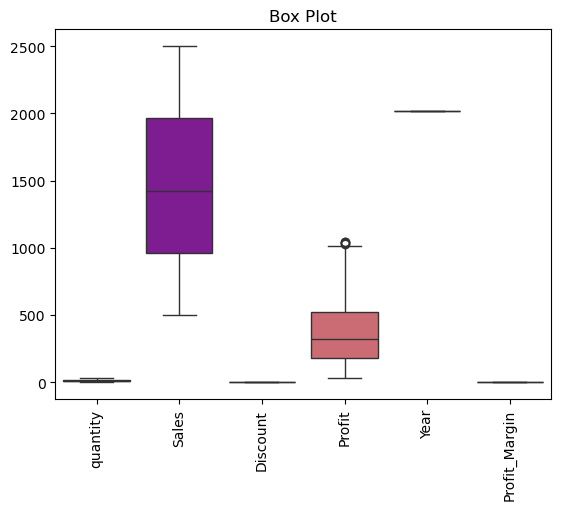

In [19]:
# Identify Outliers using BoxPlot
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.boxplot(data.select_dtypes(include=np.number), palette='plasma')
plt.title('Box Plot')
plt.xticks(rotation=90)
plt.show()

Lower bound:  -325.495
Upper bound:  1027.505
Outliers:
 43     1039.95
104    1035.00
150    1029.15
158    1040.16
Name: Profit, dtype: float64


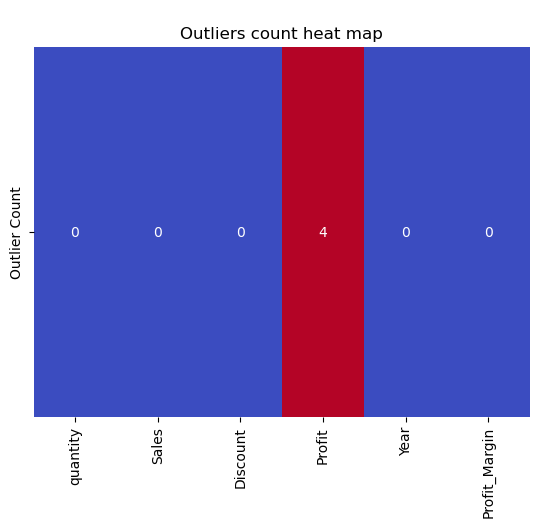

In [21]:
# Count number of outliers per column using IQR
# Identify the outlier in pofit column
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Q1=data['Profit'].quantile(0.25)
Q3=data['Profit'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
Outlier=data['Profit'][(data['Profit']<lower_bound)|(data['Profit']>upper_bound)]
print('Lower bound: ',lower_bound)
print("Upper bound: ",upper_bound)
print('Outliers:\n',Outlier)

Q1=data.select_dtypes(include=np.number).quantile(0.25)
Q3=data.select_dtypes(include=np.number).quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
Outliers=((data.select_dtypes(include=np.number)< lower_bound)|(data.select_dtypes(include=np.number)> upper_bound)).sum()
Outlier_df=pd.DataFrame(Outliers, columns=["Outlier Count"])

sns.heatmap(Outlier_df.T,cmap='coolwarm',annot=True,cbar=False)
plt.title("\nOutliers count heat map")
plt.xticks(rotation=90)
plt.show()

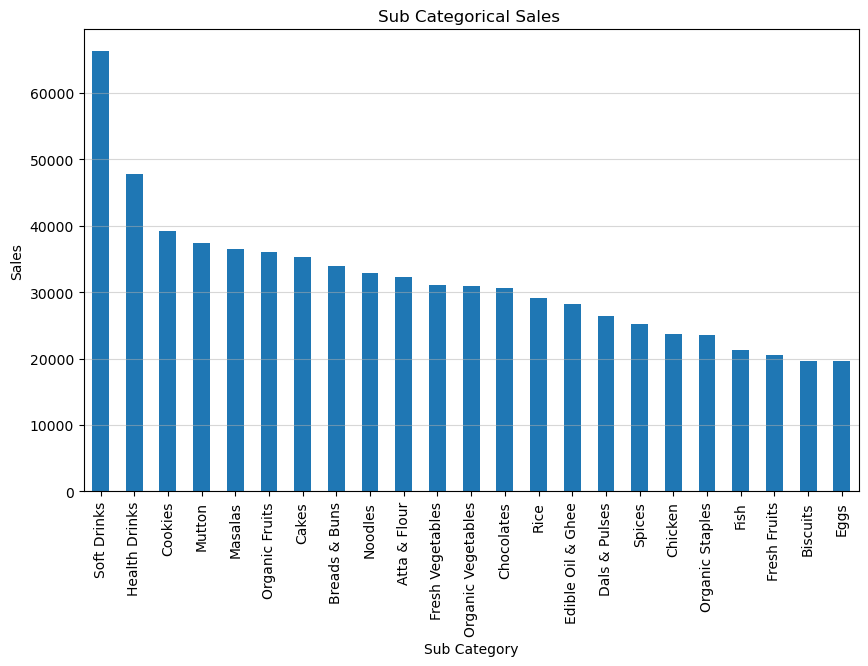

In [23]:
# Bar chart of each Sub categorical Sales
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
data.groupby("Sub Category")["Sales"].sum().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Sales')
plt.title('Sub Categorical Sales ')
plt.grid(axis='y',alpha=0.5)
plt.show()

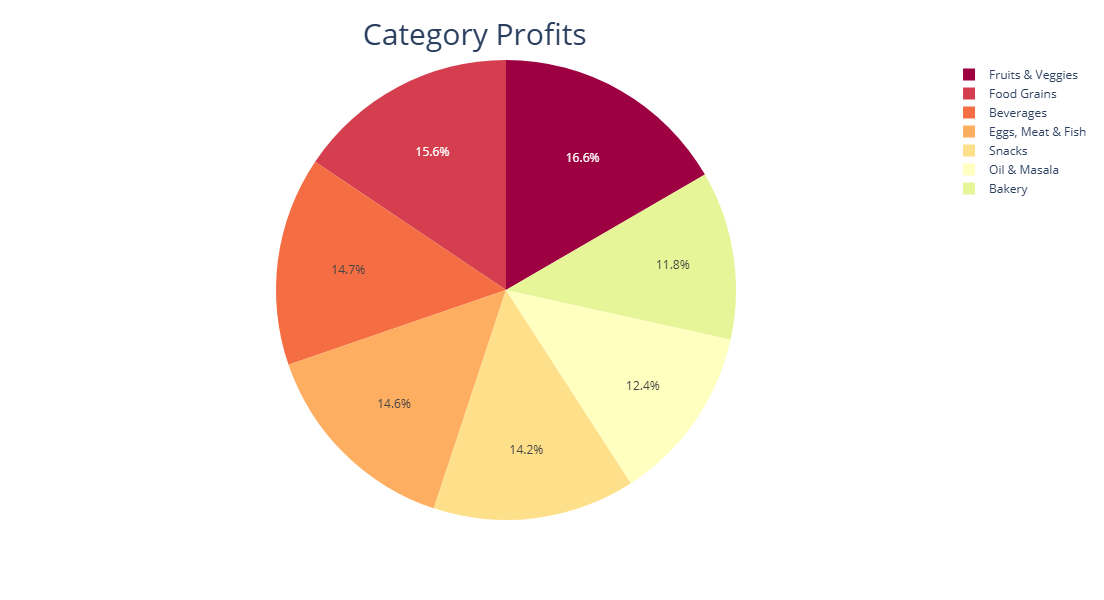

In [25]:
# Visualization of Profits by Category sales
import plotly.express as px
fig = px.pie(data, names="Category", values="Profit",color_discrete_sequence=px.colors.diverging.Spectral)
fig.update_layout( title={'text': 'Category Profits', 'x': 0.43, 'y':.96,'font_size':30},
    width=700,
    height=600)
fig.show()


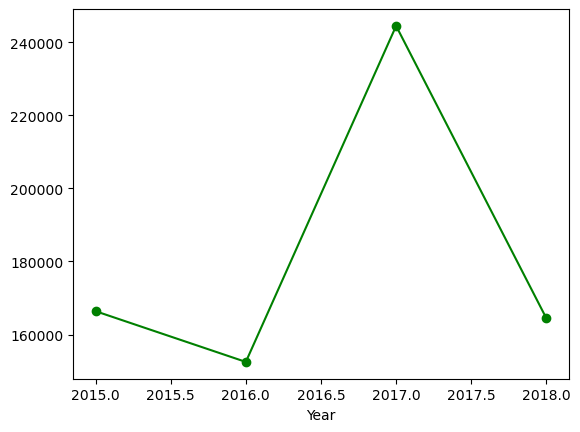

In [27]:
# Sales in overall years 
import matplotlib.pyplot as plt
data.groupby("Year")["Sales"].sum().plot(kind="line", marker="o",color='green')
plt.show()

Obseravtion: The Line Chart visualization Shows sales in each year. 
-> The Sales in 2015 is slow, then the sales decreases gradually in 2016. So the lowest slaes in 2016 year
-> In 2016, the sales rapidly increased the sales. So the highjest sales in 2017 year.
-> In 2017, the sales rapily decreased the sales and decresed in 2018 with less sales.

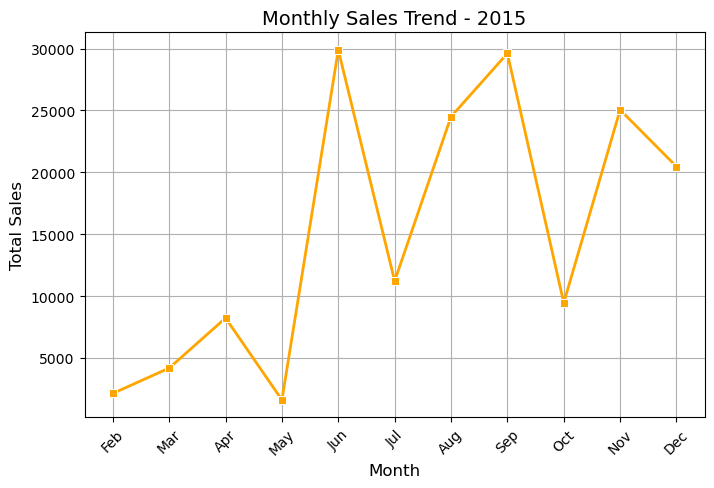

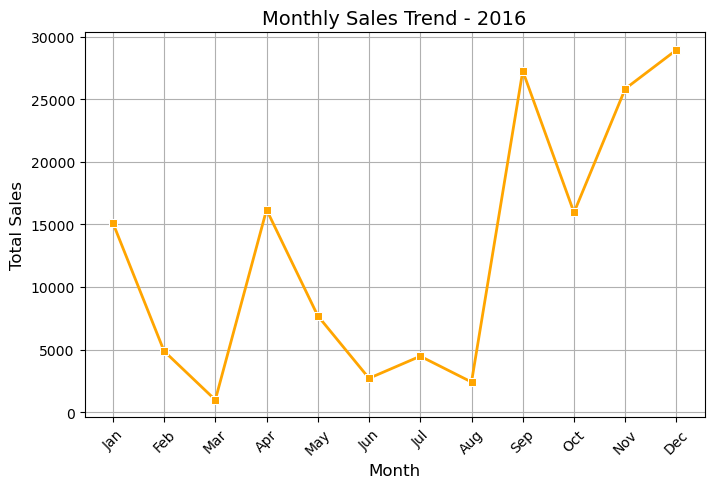

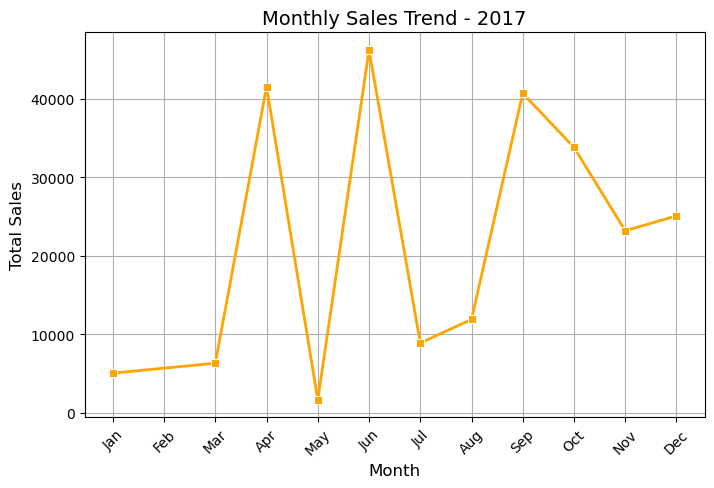

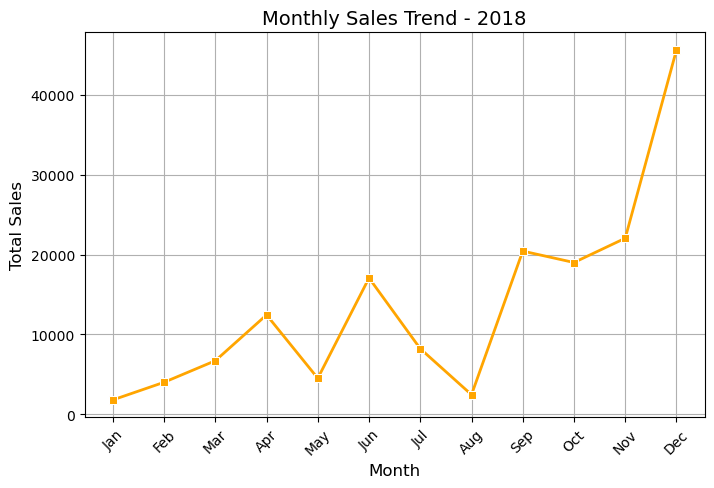

In [33]:
# Visualiztion of all months sales in all years in dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sales_per_month = data.groupby(["Year", "Month"])["Sales"].sum().reset_index()
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Sort month column correctly
sales_per_month["Month"] = pd.Categorical(sales_per_month["Month"], categories=month_order, ordered=True)
sales_per_month = sales_per_month.sort_values(["Year", "Month"])
unique_years = sales_per_month["Year"].unique()
for year in unique_years:
    yearly_data = sales_per_month[sales_per_month["Year"] == year]
    plt.figure(figsize=(8, 5))
    sns.lineplot(data=yearly_data, x="Month", y="Sales",marker='s' ,color="orange",linewidth=2)
    plt.title(f"Monthly Sales Trend - {year}", fontsize=14)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Total Sales", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

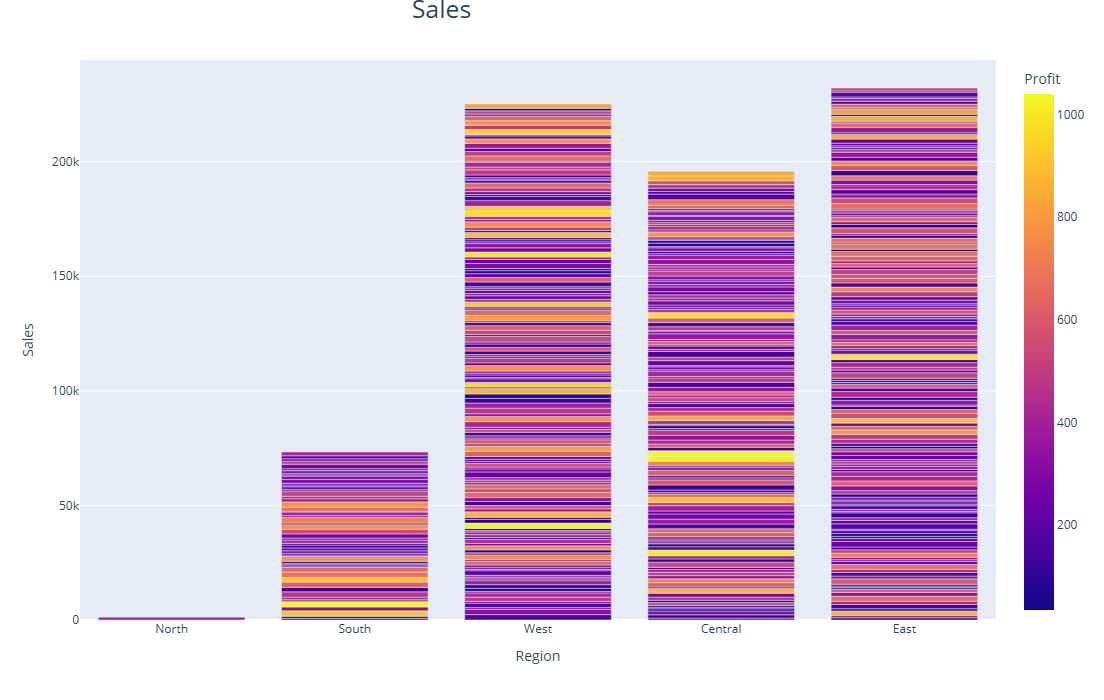

In [35]:
# Bar chart visualization of region profits
import plotly.express as px
fig = px.bar(data, x="Region", y="Sales", color="Profit")
fig.update_layout( title={'text': 'Sales', 'x': 0.4, 'y':1.0,'font_size':25},
    width=1100,
    height=700)
fig.show()


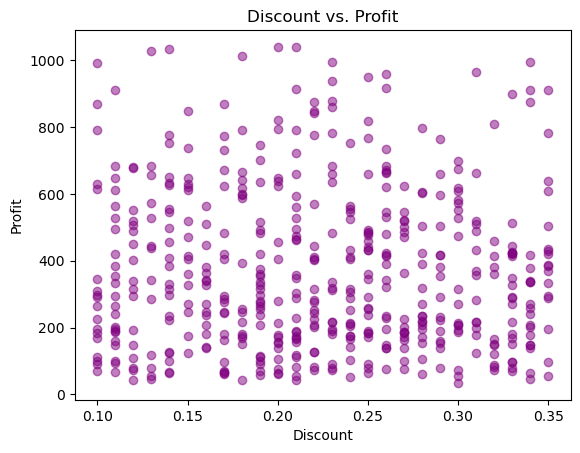

In [121]:
# Visualization of Discount vs Profit
plt.scatter(data['Discount'], data["Profit"], alpha=0.5, color = "purple")
plt.title("Discount vs. Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

In [11]:
# Convert the Categorical into Numerical values
from sklearn.preprocessing import LabelEncoder
encoding=['Order ID', 'Order Date', 'Region', 'City', 'Customer Name', 'Category', 'Sub Category','Month']
le=LabelEncoder()
for col in encoding:
    data[f'{col}']=le.fit_transform(data[col])
    print(data[[f"{col}"]].head(5))

   Order ID
0         0
1       111
2       222
3       333
4       444
   Order Date
0         131
1         131
2         104
3          69
4          69
   Region
0       2
1       3
2       4
3       3
4       3
   City
0    21
1     8
2    13
3     4
4    12
   Customer Name
0             12
1             37
2             14
3             15
4             28
   Category
0         5
1         1
2         3
3         4
4         3
   Sub Category
0            14
1            13
2             0
3            12
4            18
   Month
0      9
1      9
2      6
3     10
4     10


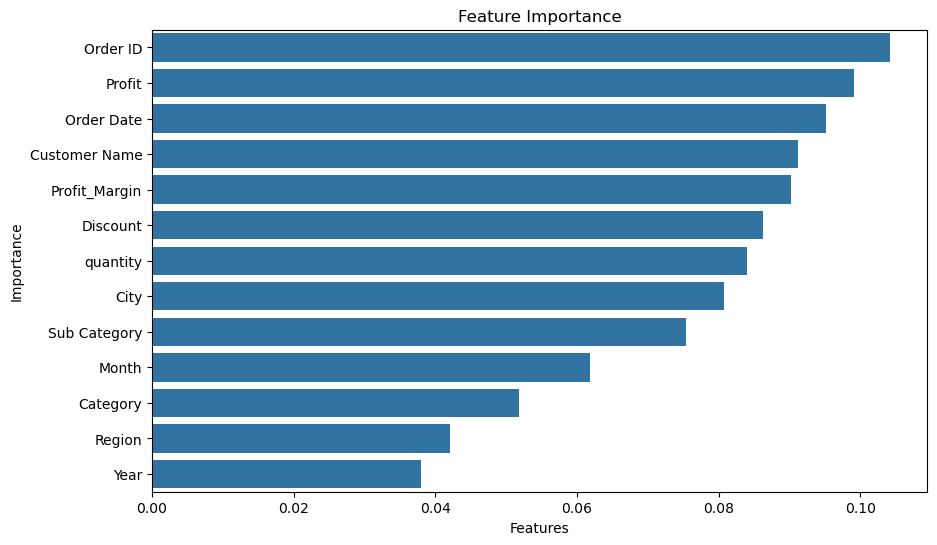

In [13]:
# Feature Importance of Sales
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
x=data.drop(columns=['Sales'])
y=data['Sales']
rf=RandomForestClassifier()
rf.fit(x,y)
feature_importance=pd.DataFrame(rf.feature_importances_,index=x.columns,columns=['Importance']).sort_values(by='Importance',ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(y=feature_importance.index,x=feature_importance['Importance'])
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [258]:
data.head(1)

,Order ID,Order Date,Region,City,Customer Name,Category,Sub Category,quantity,Sales,Discount,Profit,Month,Year,Profit_Margin
0,0,131,2,21,12,5,14,5,1254,0.12,401.28,11,2017,0.32


In [63]:
# Selecting model and Model Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
X = data.drop(columns=['Profit','Discount','Region','Order ID'])
y = data["Sales"]
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=72)

model = RandomForestRegressor(n_estimators=100,max_depth=5,min_samples_split= 10,min_samples_leaf= 2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred)
mse_rf = mean_squared_error(y_test, y_pred)
r2_rf= r2_score(y_test, y_pred)
print('Random Forest:')
print('Mean Absolute Error: ',mae_rf)
print('Mean Sqaured Error: ',mse_rf)
rmse_rf = np.sqrt(mse_rf)  
print("Root Mean Squared Error:", rmse_rf)
print( "R2:",r2_rf)



Random Forest:
Mean Absolute Error:  5.477859957606217
Mean Sqaured Error:  45.73248162880495
Root Mean Squared Error: 6.762579509980267
R2: 0.999868224472274


In [ ]:
Observation: Random Forest is an ensemble learning method that builds multiple decision trees and combines their predictions to improve accuracy and reduce overfitting.
-> Predicting monthly or yearly sales trends.
-> Forecasting sales based on product categories, discounts, regions, etc.
-> Random forest gives the good r2 score, Mean Absolute Error, Mean Sqaured Error, Root Mean Squared Error.

In [65]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost:")
print('Mean Absolute Error: ',mae_xgb)
print('Mean Sqaured Error: ',mse_xgb)
rmse_xgb = np.sqrt(mse_xgb)  # RMSE
print("Root Mean Squared Error:", rmse_xgb)
print("XGBoost - R²:", r2_xgb)

XGBoost:
Mean Absolute Error:  3.945491943359375
Mean Sqaured Error:  39.639440348669886
Root Mean Squared Error: 6.295986050546006
XGBoost - R²: 0.9998857812219091


In [39]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

X=data.drop(columns=['Profit','Discount','Region'])
y=data['Sales']
# Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize models
rf_reg = RandomForestRegressor(random_state=42)
xgb = XGBRegressor(random_state=42)

# Cross-validation to compare performance
rf_reg_cv = cross_val_score(rf_reg, X_train, y_train, cv=5)
xgb_cv = cross_val_score(xgb, X_train, y_train, cv=5)

# Print cross-validation scores
print(f"Random Forest Regression Cross-Validation Score: {rf_reg_cv.mean():.4f}")
print(f"XGB Regressor Cross-Validation Score: {xgb_cv.mean():.4f}")

# Train and test models
rf_reg.fit(X_train, y_train)
xgb.fit(X_train, y_train)
# Model Prediction
y_pred_rf = rf_reg.predict(X_test)
y_pred_xgb = xgb.predict(X_test)

rf_reg_accuracy = rf_reg.score(X_test, y_test)
xgb_accuracy = xgb.score(X_test, y_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print(f"Random Forest Regression Accuracy: {rf_reg_accuracy:.4f}")
print(f"XGB Regressor r2: {xgb_accuracy:.4f}")
print(f"Random Forest MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}")
print(f"XGBoost MAE: {mae_xgb:.4f}, RMSE: {rmse_xgb:.4f}")


Random Forest Regression Cross-Validation Score: 0.9998
XGB Regressor Cross-Validation Score: 0.9992
Random Forest Regression Accuracy: 0.9999
XGB Regressor r2: 0.9993
Random Forest MAE: 4.8167, RMSE: 6.8353
XGBoost MAE: 11.5670, RMSE: 15.1392


In [6]:
data.head(1)

,Order ID,Order Date,Region,City,Customer Name,Category,Sub Category,quantity,Sales,Discount,Profit,Month,Year,Profit_Margin
0,OD1,2017-11-08,North,Vellore,Harish,Oil & Masala,Masalas,5,1254,0.12,401.28,Nov,2017,0.32


Training Features: Index(['Order Date', 'City', 'Customer Name', 'Category', 'Sub Category',
       'quantity', 'Sales', 'Month', 'Year', 'Profit_Margin'],
      dtype='object')
Future Data Features: Index(['Month', 'Year', 'Category', 'Sub Category', 'City', 'Customer Name',
       'Profit_Margin', 'Order Date', 'quantity', 'Sales'],
      dtype='object')
    Year  Month  Predicted Sales
0   2025      1      1466.052124
1   2025      2      1466.052124
2   2025      3      1466.052124
3   2025      4      1466.052124
4   2025      5      1466.052124
5   2025      6      1466.083740
6   2025      7      1466.083740
7   2025      8      1466.083740
8   2025      9      1466.083740
9   2025     10      1466.083740
10  2025     11      1466.083740
11  2025     12      1466.083740


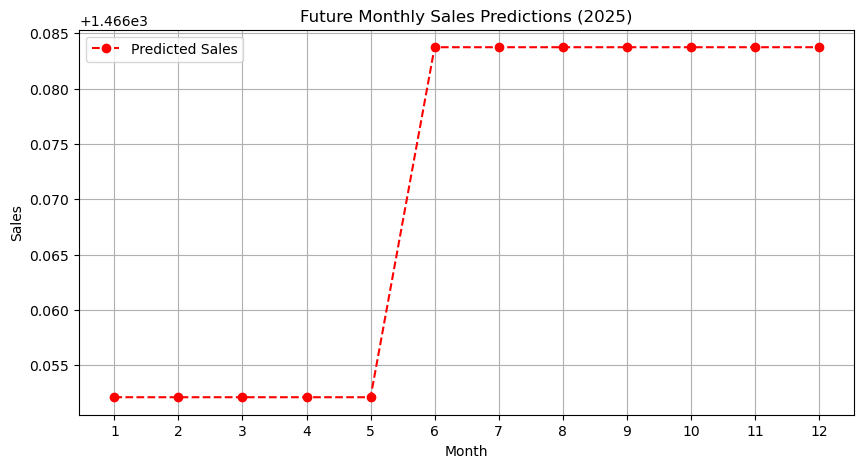

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create future time periods (Example: Next 12 months for 2025)
future_months = list(range(1, 13))  # January to December
future_years = [2025] * 12  # Predicting for 2025

# Create a DataFrame with required features
future_data = pd.DataFrame({
    "Month": future_months,
    "Year": future_years,
    "Category": 0,  # Modify based on business needs
    "Sub Category": 1,  # Modify based on available categories
    "City": 13,  # Modify based on cities in training data
    "Customer Name": 13,  # Dummy customer name
    'Profit_Margin':0.30,
    'Order Date':477,
    'quantity':25,
    'Sales':2045
})
# Check feature names before scaling
print("Training Features:", X.columns)
print("Future Data Features:", future_data.columns)

# Convert categorical columns using One-Hot Encoding (same as training)
future_data = pd.get_dummies(future_data)

# Ensure future_data has the same features as training data
#training_columns = X.columns  # Get feature columns from training set
future_data = future_data.reindex(columns=X.columns, fill_value=0)

# Apply the same scaling transformation
future_data_scaled = scaler.fit_transform(future_data)

# Make future sales predictions
future_sales_predictions = xgb_model.predict(future_data_scaled)

# Add predictions to DataFrame
future_data["Predicted Sales"] = future_sales_predictions

# Display predictions
print(future_data[["Year", "Month", "Predicted Sales"]])

# Visualize Future Sales Predictions
plt.figure(figsize=(10,5))
plt.plot(future_months, future_sales_predictions, marker="o", linestyle="--", color="red", label="Predicted Sales")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.title("Future Monthly Sales Predictions (2025)")
plt.xticks(future_months)
plt.legend()
plt.grid()
plt.show()

Conclusion: The analysis of Supermart's grocery sales reveals several significant insights that can guide future business decisions. The sales starting of year is low after 5 months,i.e, seasonal months the sales increases and continue the sales constantly. In this project used the Random forest Regressor and XGB regressor for good accuracy, both are given the good accuracy but the XGB Regressor gives the better accuracy than Random forest Regressor with slight difference of accuracy. This visualization helps for improvement in sales and profits, future predictions, easy to know the highest sales product,dicount vs profit and which month had high sales.